# MMSB: Simulations, multiple graphs sizes

In [1]:
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mmsb
import utils

%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.debugger import Tracer
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

## Simulation 0: Toy graph

In [16]:
K = 2
V = 4
N = 100
B_ = utils.make_B(K, probs=[.9])
X, pi = utils.gen_data(B_, V, N, alpha=0.05)
print pi
pd.DataFrame(utils.get_interactions(X))

[[  1.35850839e-16   1.00000000e+00]
 [  9.92502934e-01   7.49706596e-03]
 [  1.52607760e-01   8.47392240e-01]
 [  9.26054346e-01   7.39456537e-02]]


,0,1,2,3
0,0,0,6,1
1,16,0,13,10
2,9,3,0,0
3,17,4,21,0


0:00:00.371179


(-41.231442692506072, -41.231442692506072)

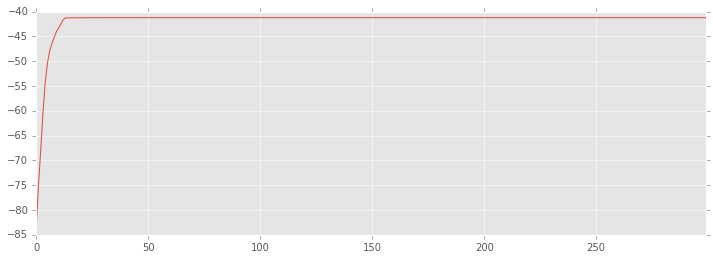

In [17]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### Pi (prototype distributions)

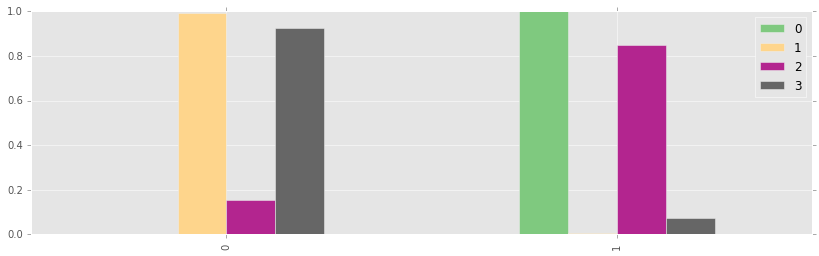

In [18]:
pd.DataFrame(pi).T.plot(kind='bar', cmap='Accent', figsize=[14,4])

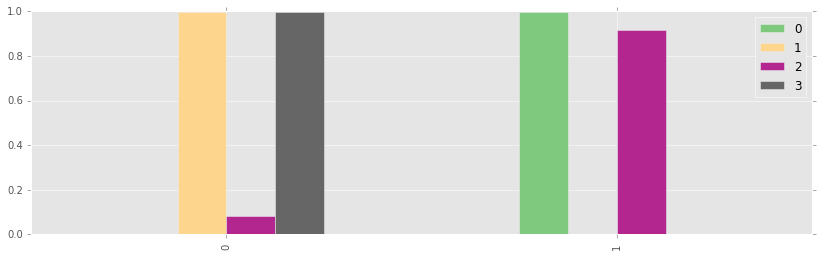

In [19]:
pd.DataFrame(gamma).plot(kind='bar', cmap='Accent', figsize=[14,4])

In [20]:
pd.DataFrame(B)

,0,1
0,0.500000,0.965286
1,0.034714,0.500000


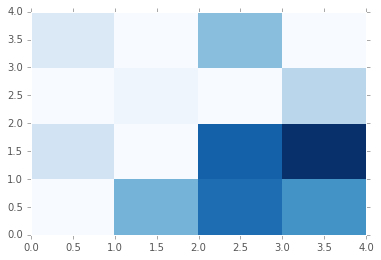

In [22]:
I = pd.DataFrame(utils.get_interactions(X))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

## Simulation I: Small graph

In [157]:
K = 4
V = 10
N = 500
B_ = utils.make_B(K, probs=[.9])
X, pi = utils.gen_data(B_, V, N, alpha=0.1)

0:00:02.071394


(-322.62924586109023, -322.62924586109023)

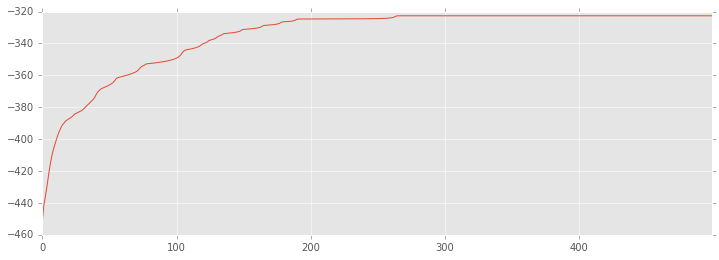

In [161]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, n_iter=500)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

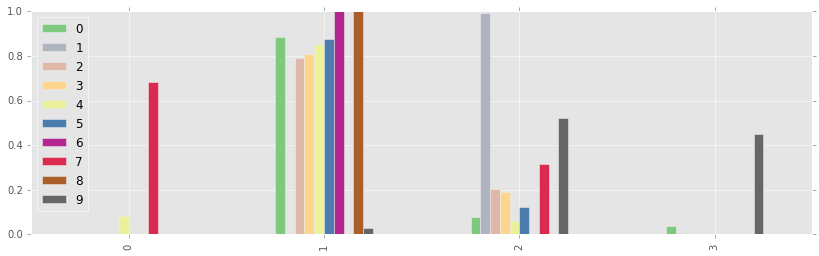

In [162]:
pd.DataFrame(pi).T.plot(kind='bar', cmap='Accent', figsize=[14,4])

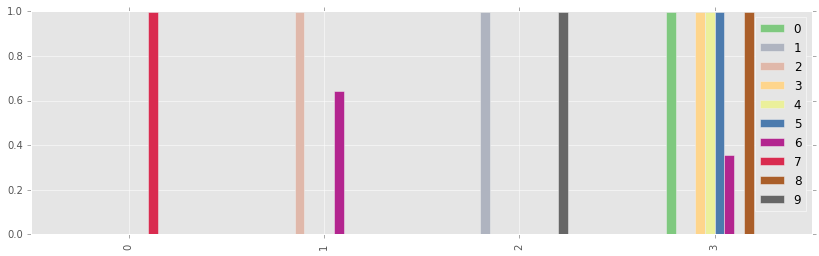

In [163]:
pd.DataFrame(gamma).plot(kind='bar', cmap='Accent', figsize=[14,4])

In [36]:
pd.DataFrame(B).round(6)

,0,1,2,3
0,0.500000,0.720208,0.297372,0.759043
1,0.279792,0.500000,0.176005,0.753559
2,0.702628,0.823995,0.500000,0.776909
3,0.240957,0.246441,0.223091,0.500000


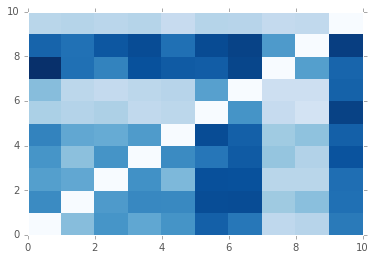

In [37]:
I = pd.DataFrame(utils.get_interactions(X))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

## Simulation II: Medium graph

In [65]:
K = 4
V = 100
N = 10000
B_ = utils.make_B(K, probs=[.9])
X, pi = utils.gen_data(B_, V, N, alpha=0.05)

0:00:29.608836


(-5052.8886749877747, -5052.8886749877747)

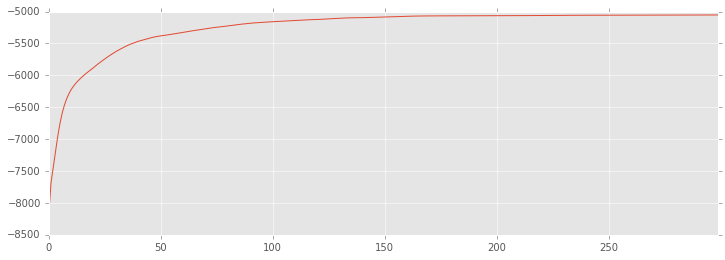

In [66]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### Interaction matrix

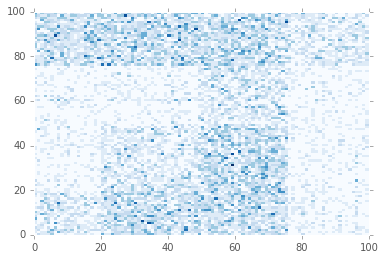

In [68]:
I = pd.DataFrame(utils.get_interactions(X))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

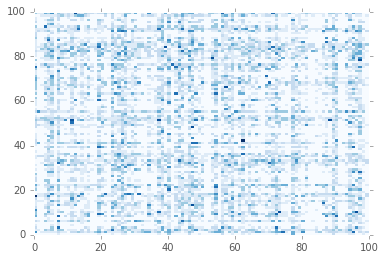

In [61]:
plt.pcolor(I, cmap='Blues')

## Simulation III: Large graph

In [ ]:
K = 10
V = 300
N = 10000
B_ = utils.make_B(K, probs=[.9])
X, pi = utils.gen_data(B_, V, N, alpha=0.05)

In [ ]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### Interaction matrix

In [ ]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')